In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
bankloan = pd.read_csv('bankloan(1).csv')

In [ ]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [ ]:
X = bankloan[fitur]
y = bankloan[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2,
    random_state = 42 # make the result consistent
)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
depth = range(1,26,1)
training_accuracy = []
testing_accuracy = []
score = 0

for i in depth:
  dt = DecisionTreeClassifier(criterion='gini', max_depth= i)
  dt.fit(X_train, y_train)

  y_predict_train = dt.predict(X_train)
  training_accuracy.append(accuracy_score(y_train, y_predict_train))
  

  y_predict_test = dt.predict(X_test)
  testing_accuracy.append(accuracy_score(y_test, y_predict_test))
  acc_score = accuracy_score(y_test,y_predict_test)

  if score < acc_score:
    score = acc_score
    best_depth = i

In [ ]:
depth_result = pd.DataFrame.from_dict({
      'depth' : depth,
      'training' : training_accuracy,
      'testing' : testing_accuracy
})

In [ ]:
depth_result['diff'] = np.abs(depth_result['training'] - depth_result['testing'])
depth_result

,depth,training,testing,diff
0,1,0.739286,0.735714,0.003571
1,2,0.776786,0.778571,0.001786
2,3,0.789286,0.807143,0.017857
3,4,0.803571,0.771429,0.032143
4,5,0.833929,0.785714,0.048214
5,6,0.855357,0.750000,0.105357
6,7,0.885714,0.735714,0.150000
7,8,0.907143,0.721429,0.185714
8,9,0.935714,0.728571,0.207143
9,10,0.958929,0.700000,0.258929


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

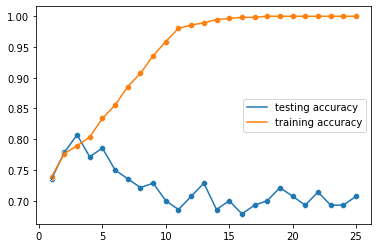

In [ ]:
plt.figure()
sns.lineplot(depth,testing_accuracy)
sns.scatterplot(depth,testing_accuracy)
sns.lineplot(depth,training_accuracy)
sns.scatterplot(depth,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])

In [ ]:
print('best k:', best_depth)
print('accuracy:', score)

best k: 3
accuracy: 0.8071428571428572
